In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!unzip "/content/drive/My Drive/Analytics_Vidya_cv/av_independence_day/train1.zip"
!unzip "/content/drive/My Drive/Analytics_Vidya_cv/av_independence_day/test1.zip"

Archive:  /content/drive/My Drive/Analytics_Vidya_cv/av_independence_day/train1.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               
Archive:  /content/drive/My Drive/Analytics_Vidya_cv/av_independence_day/test1.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                


# Loading the data

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [6]:
abstracts = train['ABSTRACT']
titles = train['TITLE']

In [7]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [8]:
train.shape

(20972, 9)

Removing any empty string

In [9]:
filt = train['ABSTRACT'] != ""
train = train[filt]
train = train.dropna()

In [10]:
train['ABSTRACT'][123]

'  In this review article, we discuss recent studies on drops and bubbles in\nHele-Shaw cells, focusing on how scaling laws exhibit crossovers from the\nthree-dimensional counterparts and focusing on topics in which viscosity plays\nan important role. By virtue of progresses in analytical theory and high-speed\nimaging, dynamics of drops and bubbles have actively been studied with the aid\nof scaling arguments. However, compared with three dimensional problems,\nstudies on the corresponding problems in Hele-Shaw cells are still limited.\nThis review demonstrates that the effect of confinement in the Hele-Shaw cell\nintroduces new physics allowing different scaling regimes to appear. For this\npurpose, we discuss various examples that are potentially important for\nindustrial applications handling drops and bubbles in confined spaces by\nshowing agreement between experiments and scaling theories. As a result, this\nreview provides a collection of problems in hydrodynamics that may be\na

In [11]:
print("Computer Science:" + str(train["Computer Science"][123]))
print("Physics:" + str(train["Physics"][123]))
print("Mathematics:" + str(train["Mathematics"][123]))
print("Statistics:" + str(train["Statistics"][123]))
print("Quantitative Biology:" + str(train["Quantitative Biology"][123]))
print("Quantitative Finance:" + str(train["Quantitative Finance"][123]))

Computer Science:0
Physics:1
Mathematics:0
Statistics:0
Quantitative Biology:0
Quantitative Finance:0


Plotting the count of each topic

In [12]:
labels = train[["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]]
labels.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


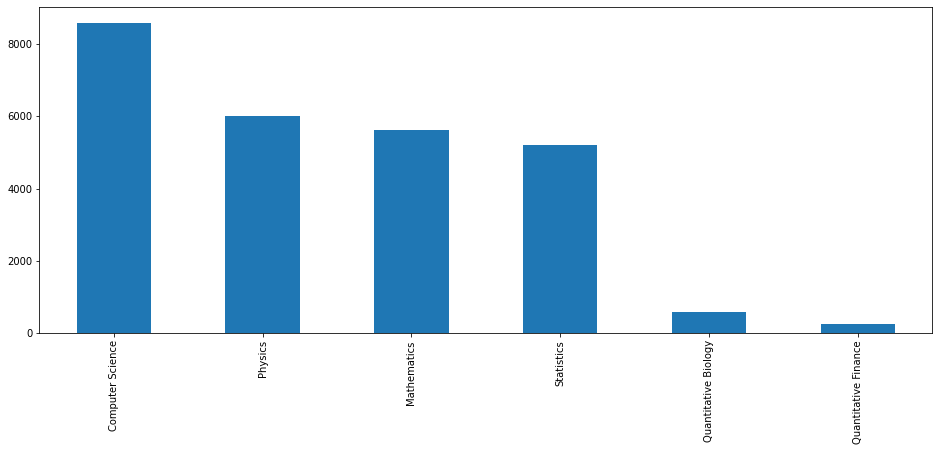

In [13]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
labels.sum(axis = 0).plot.bar()

We observe that the columns are in order of the occurences of the courses

# Creating the Text classification model

In [14]:
import nltk
nltk.download('stopwords')
def preprocess_text(text):
    #remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    #removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    new_text = ""
    for word in text.split():
        if word not in stopwords.words("english"):
            new_text = new_text + ' ' + word
    
    return new_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
X = []
texts = list(train["ABSTRACT"])
for t in texts:
    X.append(preprocess_text(t))
y = labels.values

In [16]:
X[4]

' Fourier transform infra red FTIR spectra samples plant species used explore influence preprocessing feature extraction efficiency machine learning algorithms Wavelet Tensor Train WTT Discrete Wavelet Transforms DWT compared feature extraction techniques FTIR data medicinal plants Various combinations signal processing steps showed different behavior applied classification clustering tasks Best results WTT DWT found grid search similar significantly improving quality clustering well classification accuracy tuned logistic regression comparison original spectra Unlike DWT WTT one parameter tuned rank making versatile easier use data processing tool various signal processing applications'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle = True)

In [ ]:
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index)+1

max_len = 200

X_train = pad_sequences(X_train, padding = 'post', maxlen = max_len)
X_test = pad_sequences(X_test, padding = 'post', maxlen = max_len)

In [ ]:
vocab_size

47378

I will be using GLoVe word embeddings to convert text into numerals

In [ ]:
from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
embeddings_dictionary = dict()

glove_file = open('/content/drive/My Drive/done assg/glove.6B.100d.txt', encoding = "utf8")

In [ ]:
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype = 'float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

In [ ]:
y_test

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 0, 1, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [ ]:
embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [ ]:
inputs = Input(shape = (max_len,))
embedding_layer = Embedding(vocab_size, 100, weights = [embedding_matrix], trainable = False)(inputs)
LSTM_1 = LSTM(256)(embedding_layer)
dense_1 = Dense(6, activation = 'sigmoid')(LSTM_1)
model = Model(inputs = inputs, outputs = dense_1)
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 200, 100)          4737800   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               365568    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 5,104,910
Trainable params: 367,110
Non-trainable params: 4,737,800
_________________________________________________________________


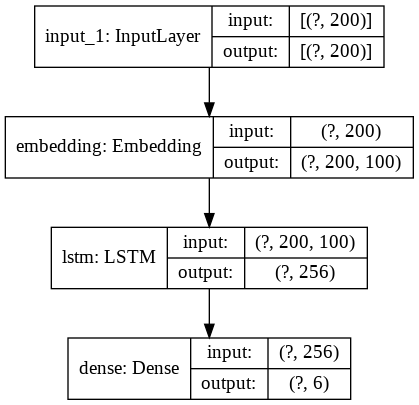

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size = 128, epochs = 20, verbose = 1)

Epoch 1/20
148/148 [==============================] - 4s 29ms/step - loss: 0.4475 - acc: 0.4036
Epoch 2/20
148/148 [==============================] - 4s 28ms/step - loss: 0.4359 - acc: 0.4101
Epoch 3/20
148/148 [==============================] - 4s 29ms/step - loss: 0.4360 - acc: 0.4055
Epoch 4/20
148/148 [==============================] - 4s 28ms/step - loss: 0.4354 - acc: 0.4101
Epoch 5/20
148/148 [==============================] - 4s 28ms/step - loss: 0.4356 - acc: 0.4101
Epoch 6/20
148/148 [==============================] - 4s 29ms/step - loss: 0.4353 - acc: 0.4101
Epoch 7/20
148/148 [==============================] - 4s 29ms/step - loss: 0.4356 - acc: 0.4101
Epoch 8/20
148/148 [==============================] - 4s 29ms/step - loss: 0.4356 - acc: 0.4101
Epoch 9/20
148/148 [==============================] - 4s 29ms/step - loss: 0.4437 - acc: 0.4228
Epoch 10/20
148/148 [==============================] - 4s 29ms/step - loss: 0.3938 - acc: 0.5176
Epoch 11/20
148/148 [==================

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

66/66 [==============================] - 1s 8ms/step - loss: 0.2378 - acc: 0.7073
Loss :  0.23775354027748108
Accuracy :  0.7073403000831604


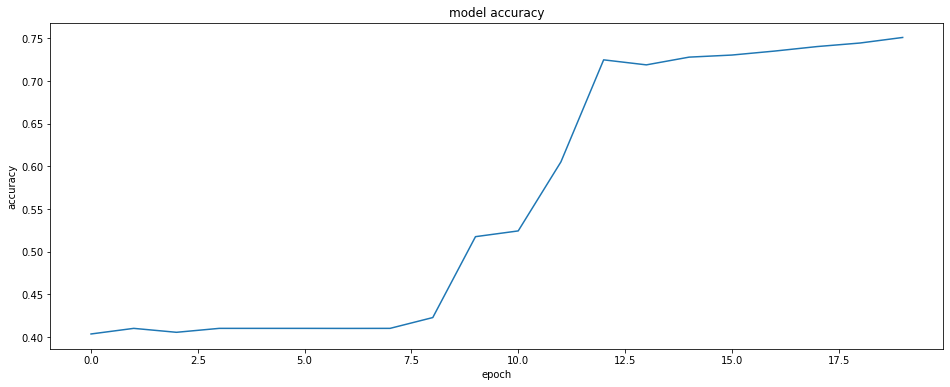

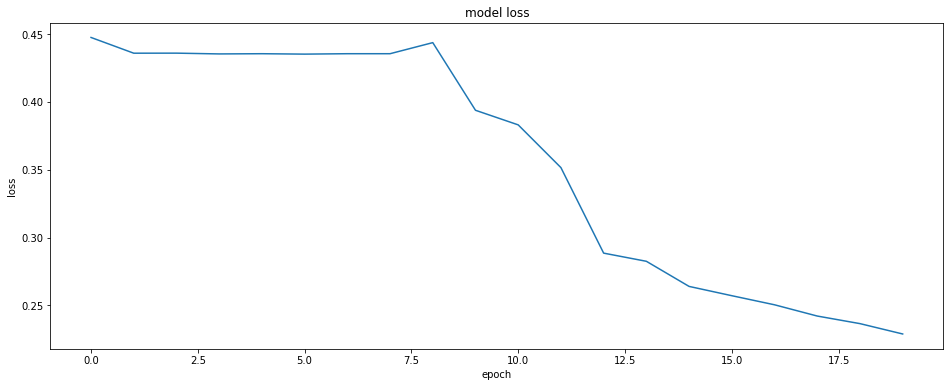

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
X_t = []
test_abs = list(test['ABSTRACT'])
for t in test_abs:
   X_t.append(preprocess_text(t)) 

In [ ]:
X_t = tokenizer.texts_to_sequences(X_t)
X_t = pad_sequences(X_t, padding = 'post', maxlen = max_len)
pred = model.predict(X_t)

In [ ]:
pred[0]

array([0.24365917, 0.02036406, 0.5220468 , 0.8269157 , 0.02180343,
       0.03002823], dtype=float32)

In [ ]:
for i in range(pred.shape[0]):
    for j in range(pred.shape[1]):
        if pred[i][j] >= 0.45:
          pred[i][j] = 1
        else:
          pred[i][j] = 0

In [ ]:
output = pd.DataFrame()
output['ID'] = test['ID']
output['Computer Science'] = pred[:, 0]
output['Physics'] = pred[:, 1]
output['Mathematics'] = pred[:, 2]
output['Statistics'] = pred[:, 3]
output['Quantitative Biology'] = pred[:, 4]
output['Quantitative Finance'] = pred[:, 5]

In [ ]:
courses = [["Computer Science", "Physics", "Mathematics", "Statistics", "Quantitative Biology", "Quantitative Finance"]]
for column in courses:
    output[column] = output[column].astype(int)

In [ ]:
output.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,20973,0,0,1,1,0,0
1,20974,0,1,0,0,0,0
2,20975,1,0,0,1,0,0
3,20976,0,1,0,0,0,0
4,20977,1,0,0,0,0,0


In [ ]:
output.to_csv("Keras LSTM.csv", index = False)

# ROBERTA TRANSFORMER

train["ABSTRACT"] = pd.Series(X)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
filt = train['ABSTRACT'] != ""
train = train[filt]
train = train.dropna()

In [ ]:
import nltk
nltk.download('stopwords')
def preprocess_text(text):
    #remove punctuations and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    #single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    
    #removing multiple spaces
    text = re.sub(r'\s+', ' ', text)
    
    new_text = ""
    for word in text.split():
        if word not in stopwords.words("english"):
            new_text = new_text + ' ' + word
    
    return new_text

In [ ]:
X = []
texts = list(train["ABSTRACT"])
for t in texts:
    X.append(preprocess_text(t))
y = labels.values

In [18]:
traintmp = train.drop(['TITLE'],axis=1)

In [19]:
df = traintmp
df['labels'] = list(zip(df['Computer Science'].tolist(), df.Physics.tolist(), df.Mathematics.tolist(), df.Statistics.tolist(),  df['Quantitative Biology'].tolist(), df['Quantitative Finance'].tolist()))
# traintmp

In [20]:
df1 = df.drop(["Computer Science","Physics", "Mathematics", "Statistics","Quantitative Biology", 
         "Quantitative Finance", "ID"], axis=1)

In [21]:
df1

,ABSTRACT,labels
0,Predictive models allow subject specific infe...,"(1, 0, 0, 0, 0, 0)"
1,Rotation invariance translation invariance gr...,"(1, 0, 0, 0, 0, 0)"
2,We introduce develop notion spherical polyhar...,"(0, 0, 1, 0, 0, 0)"
3,The stochastic Landau Lifshitz Gilbert LLG eq...,"(0, 0, 1, 0, 0, 0)"
4,Fourier transform infra red FTIR spectra samp...,"(1, 0, 0, 1, 0, 0)"
...,...,...
20967,Machine learning finding increasingly broad a...,"(1, 1, 0, 0, 0, 0)"
20968,Polycrystalline diamond coatings grown cement...,"(0, 1, 0, 0, 0, 0)"
20969,We present new approach identifying situation...,"(1, 0, 0, 0, 0, 0)"
20970,The sum Log normal variates encountered many ...,"(0, 0, 1, 1, 0, 0)"


In [22]:
from sklearn.model_selection import train_test_split
train_df, eval_df = train_test_split(df1, test_size=0.2)

In [23]:
!pip install simpletransformers

In [24]:
from simpletransformers.classification import MultiLabelClassificationModel

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [25]:
model = MultiLabelClassificationModel('roberta', 'roberta-base', num_labels=6, args={'train_batch_size':2, 'gradient_accumulation_steps':16, 'learning_rate': 3e-5, 'num_train_epochs': 3, 'max_seq_length': 200})

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForMultiLabelSequenceClassification: ['lm_head.bias', 'lm_head.dense.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight']
- This IS expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing RobertaForMultiLabelSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForMultiLabelSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'clas

In [26]:
model.train_model(train_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:282: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:231: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  warnings.warn("To get the last learning rate computed by the scheduler, "


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:200: UserWarning: Please also save or load the state of the optimzer when saving or loading the scheduler.
  warnings.warn(SAVE_STATE_WARNING, UserWarning)


In [27]:
result, model_outputs, wrong_predictions = model.eval_model(eval_df)

/usr/local/lib/python3.6/dist-packages/simpletransformers/classification/classification_model.py:754: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  "Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels."


In [28]:
X_t = []
test_abs = list(test['ABSTRACT'])
for t in test_abs:
   X_t.append(preprocess_text(t)) 

In [29]:
preds, outputs = model.predict(X_t)

In [42]:
outputs[6]

array([0.04636561, 0.01223187, 0.84064424, 0.9692208 , 0.01135511,
       0.01307487], dtype=float32)

In [41]:
preds[6]
# df1 = df.drop(["Computer Science","Physics", "Mathematics", "Statistics","Quantitative Biology", 
#          "Quantitative Finance", "ID"], axis=1)

[0, 0, 1, 1, 0, 0]

In [32]:
sub_df = pd.DataFrame(preds,columns=["Computer Science","Physics", "Mathematics", "Statistics","Quantitative Biology", 
         "Quantitative Finance"])

In [33]:
sub_df['ID'] = test['ID']

In [34]:
sub_df = sub_df[["ID","Computer Science","Physics", "Mathematics", "Statistics","Quantitative Biology", 
         "Quantitative Finance"]]

In [35]:
sub_df.to_csv('transformer(roberta3).csv', index=False)